In [59]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import sys
import seaborn as sns
pio.renderers.default = "browser"

sys.setrecursionlimit(10000)

In [ ]:
group_key = {'A' : ['Arequipa', 'Huancavelica', 'Junín', 'Lima', 'Monquegua', 'Piura', 'San Martín'],
             'B' : ['Ayacucho', 'Callao', 'Cusco', 'La Libertad', 'Lambayeque', 'Loreto', 'Pasco', 'Puno', 'Tacna', 'Tumbes', 'Ucayali'],
             'C' : ['Amazonas', 'Madre de Dios']}

group_mapping = {dep : key for key in ['A', 'B', 'C'] for dep in group_key[key] }
distritos_arr = raw_data['Departamento'].to_numpy()

groups = []
for dep in distritos_arr:
    try:
        groups.append(group_mapping[dep])
    except:
        groups.append('X')
#something = distritos_arr.
#something

In [2]:
raw_data = pd.read_excel('../data/xlsx/ord80p.xlsx', header = [0], index_col=None)
log_data = pd.read_excel('../data/xlsx/ordfinal80.xlsx', header = [0], index_col=None)
#log_data = log_data.drop(['Latitud (Decimal)','Longitud (Decimal)','Departamento','Provincia','Distrito'], axis = 1)
#raw_data = raw_data.drop(['ranva'], axis=1).fillna(0.0)

In [101]:
print([ str(i)+': '+item for i, item in enumerate(list(raw_data.columns))])

['0: Fecha entrega del Informe', '1: Tipo de vía', '2: Piso', '3: Departamento', '4: Provincia', '5: Distrito', '6: Número de estacionamiento', '7: Depósitos', '8: Latitud (Decimal)', '9: Longitud (Decimal)', '10: Categoría del bien', '11: Posición', '12: Número de frentes', '13: Edad', '14: Elevador', '15: Estado de conservación', '16: Método Representado', '17: Área Terreno', '18: Área Construcción', '19: Valor comercial (USD)', '20: ranva']


In [3]:
#log_data.to_pickle('../data/pak/log_data_pack_bigger')
log_data.head()

,FechadelInforme,TipodeVia,Piso,Estacionamiento,Depositos,Categoriadelbien,Posicion,Numerodefrentes,Edad,Elevador,Estadodeconservacion,MetodoRepresentado,Areaterreno,Areaconstruccion,Valorcomercial
0,4.642247,0.477121,-5.0,-5.0,-5.0,0.000000,-5.0,-5.0,1.176091,-5.0,0.602060,0.00000,1.875061,2.277609,5.229444
1,4.636207,0.477121,-5.0,-5.0,-5.0,0.301030,-5.0,-5.0,0.698970,-5.0,0.602060,0.30103,1.104487,1.972527,5.205305
2,4.639417,0.301030,-5.0,-5.0,-5.0,0.477121,-5.0,-5.0,1.204120,-5.0,0.477121,0.00000,2.204120,2.649724,5.469184
3,4.638829,0.477121,-5.0,0.0,-5.0,0.301030,-5.0,-5.0,0.000000,-5.0,0.301030,0.30103,0.595496,1.932271,5.096037
4,4.645550,0.000000,-5.0,-5.0,-5.0,0.301030,-5.0,-5.0,-5.000000,-5.0,0.000000,0.00000,1.778151,1.440594,4.371086


In [90]:
features = ['Fecha entrega del Informe', 
            'Tipo de vía', 
            'Piso', 
            'Número de estacionamiento',
            'Depósitos',
            'Categoría del bien',
            'Posición', 
            'Número de frentes', 
            'Edad', 
            'Elevador',
            'Estado de conservación', 
            'Método Representado', 
            'Área Terreno',
            'Área Construcción']

In [91]:
data = raw_data[features[:1]].copy()
data = data.applymap(lambda x : float(x.replace(',','')) if isinstance(x,str) else x)

log_raw = data.applymap(lambda x : np.log10(x + 0.0000001) if isinstance(x,float) else x)

In [4]:
pca = PCA()
df_st =  StandardScaler().fit_transform(log_data)
pca_out = pca.fit(df_st)
components = pca.fit_transform(df_st)

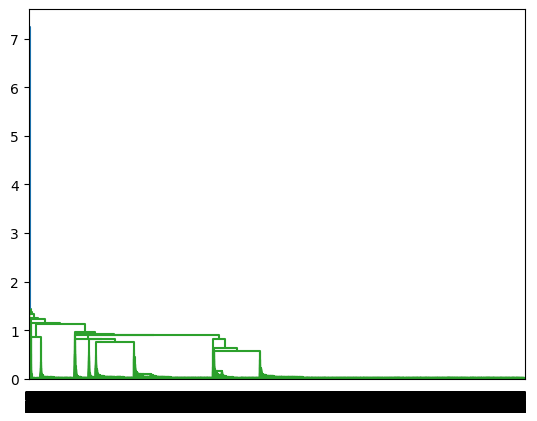

In [6]:
y = pdist(components,'euclidean')
linkage_data = linkage(y, method='single', metric='euclidean')
dendrogram(linkage_data, count_sort=True)

plt.show()

In [23]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster

#culsters = KMeans(n_clusters=7).fit(components)

In [29]:
#type(linkage_data)
np.save('hirarchy_model', linkage_data)

In [118]:
log_data_2 = log_data.drop(['Piso', 'Depositos'], axis=1)

log_data_2.to_pickle('../data/pak/log_data_final')

In [102]:
pca = PCA(n_components=8)
#df_st =  StandardScaler().fit_transform(log_data)
pca_out = pca.fit(log_data_2)
components = pca.fit_transform(log_data_2)

In [117]:
#log_data_2.iloc[123]

dato_ais = log_data_2.iloc[123].to_numpy()
dato_ais = dato_ais[:12]

compont2 = pca.transform([dato_ais])

/home/ric/Documents/Code/hackathonBBVA/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



ValueError: X has 12 features, but PCA is expecting 13 features as input.

In [100]:
components.shape

(42604, 13)

In [115]:
#components_df = pd.DataFrame(components[:,1:13], columns=['PC '+ str(i+1) + ' ' + '({:.2f}%)'.format(pca.explained_variance_ratio_[i]*100) for i in range(1,13)])
#components_df.insert(0, 'Valorcomercial', log_data['Valorcomercial'].to_numpy())

fig = px.scatter_matrix(raw_data.iloc[:,[0,1,6,10,11,12,13,14,15,16,17,18,19]].fillna(0.0),
    #dimensions=['PC '+ str(i+1) + ' ' + '({:.2f}%)'.format(pca.explained_variance_ratio_[i]*100) for i in range(1,13)],
    #color="Valor comercial (USD)",
    title="Scatter matrix of data set",
    labels=log_data.columns[[0,1,3,5,6,7,8,9,10,11,12,13,14]]) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.update_traces(marker_size=1)

fig.update_layout(font=dict(size=10))

fig.update_layout({"xaxis"+str(i+1): dict(showticklabels = False, title=log_data.columns[i][:3].upper()) for i in range(15)})
fig.update_layout({"yaxis"+str(i+1): dict(showticklabels = False, title=log_data.columns[i][:3].upper()) for i in range(15)})

fig.update_layout(margin={"r":150,"t":20,"l":150,"b":20})
fig.show()

/home/ric/Documents/Code/hackathonBBVA/venv/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [116]:
fig = px.scatter_matrix(log_data.iloc[:,[0,1,3,5,6,7,8,9,10,11,12,13,14]],
    #dimensions=['PC '+ str(i+1) + ' ' + '({:.2f}%)'.format(pca.explained_variance_ratio_[i]*100) for i in range(1,13)],
    #color="Valor comercial (USD)",
    title="Scatter matrix of data set",
    labels=log_data.columns[[0,1,3,5,6,7,8,9,10,11,12,13,14]]) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.update_traces(marker_size=1)

fig.update_layout(font=dict(size=10))

fig.update_layout({"xaxis"+str(i+1): dict(showticklabels = False, title=log_data.columns[i][:3].upper()) for i in range(15)})
fig.update_layout({"yaxis"+str(i+1): dict(showticklabels = False, title=log_data.columns[i][:3].upper()) for i in range(15)})


fig.update_layout(margin={"r":150,"t":20,"l":150,"b":20})
fig.show()

/home/ric/Documents/Code/hackathonBBVA/venv/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [127]:
#culsters = fcluster(linkage_data, 1.)
#wierd = np.load('Clustering_W/clusters_labels.npy')

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=raw_data['Categoría del bien'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
)
fig.update_traces(marker_size = 1)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [40]:
components[:,2:13].shape
#(components[:][2:11]).shape

(42604, 11)

In [119]:
components_df = pd.DataFrame(components, columns=['PC'+str(i+1)+' ({:.1f})%'.format(pca.explained_variance_ratio_[i]*100) for i in range(15)])
components_df.insert(0, 'Valorcomercial', log_data['Valorcomercial'].to_numpy())

fig = px.scatter_matrix(components_df,
    dimensions=['PC'+str(i+1)+' ({:.1f})%'.format(pca.explained_variance_ratio_[i]*100) for i in range(15)],
    color="Valorcomercial",
    title="PCA Pairs plot",
    labels=components_df.columns) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.update_traces(marker_size=1)

fig.update_layout(font=dict(size=10))

fig.update_layout({"xaxis"+str(i+1): dict(showticklabels = False) for i in range(15)})
fig.update_layout({"yaxis"+str(i+1): dict(showticklabels = False, title='PC'+str(i+1)) for i in range(15)})


fig.update_layout(margin={"r":150,"t":20,"l":150,"b":20})

fig.show()

/home/ric/Documents/Code/hackathonBBVA/venv/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [125]:
components_df = pd.DataFrame(components[:,1:13], columns=['PC'+str(i+1)+' ({:.1f})%'.format(pca.explained_variance_ratio_[i]*100) for i in range(1,13)])
components_df.insert(0, 'Valorcomercial', log_data['Valorcomercial'].to_numpy())

fig = px.scatter_matrix(components_df,
    dimensions=['PC'+str(i+1)+' ({:.1f})%'.format(pca.explained_variance_ratio_[i]*100) for i in range(1,13)],
    color=raw_data['Categoría del bien'],
    title="Reduced PCA Pairs plot",
    labels=components_df.columns) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.update_traces(marker_size=1)

fig.update_layout(font=dict(size=10))

fig.update_layout({"xaxis"+str(i+1): dict(showticklabels = False) for i in range(15)})
fig.update_layout({"yaxis"+str(i+1): dict(showticklabels = False, title='PC'+str(i+1)) for i in range(15)})


fig.update_layout(margin={"r":150,"t":20,"l":150,"b":20})

fig.show()

/home/ric/Documents/Code/hackathonBBVA/venv/lib/python3.10/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [129]:
#culsters = fcluster(linkage_data, 1.)
#wierd = np.load('Clustering_W/clusters_labels.npy')

fig = px.scatter_3d(
    components, x=1, y=4, z=9, color=log_data['Valorcomercial'],
    labels={'1': 'PC 2', '4': 'PC 5', '9': 'PC 10'},
)
fig.update_traces(marker_size = 1)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [53]:
#components_df = pd.DataFrame(components, columns=['PC '+ str(i) + ' ' + '({:.2f}%)'.format(pca.explained_variance_ratio_[i]*100) for i in range(15)])

#sns.pairplot(components_df, hue = log_data['Valorcomercial'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().